# Employees classification 

In this notebook, i setted up a script that preddicts if a employee is planning to leave a company where he is working, by analyzing different attributes of the employee. It was trained and tested with labeled data. The best algorithm achieved consisted in a logistic regression model with tuned hyperparameters. It has a 0.88 accuracy, a 0.46 recall and a 0.73 precission.

## Imports

In [1]:
# libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

# sklearn models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

# other necesary sklearn tools
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


## Let´s load / inspect our data

In [2]:
data_raw = pd.read_csv("Human_Resources.csv")

In [3]:
pd.set_option("display.max_columns", None) # I want to see all columns
data_raw.head()

# note: Attrition is the target, "yes" means the employee leaved the company.

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [4]:
data_raw.shape #35 attributes, 1470 samples.

(1470, 35)

In [5]:
data_raw.info() # Lots of non numerical columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

In [6]:
data_raw.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


## Lets use plots to get a better insight of the data

In [7]:
# Before i start plotting, i´ll codify the attrition, overtime, and over18 columns.

data_raw["Attrition"] = data_raw["Attrition"].apply(lambda x: 1 if x=="Yes" else 0)
data_raw["OverTime"] = data_raw["OverTime"].apply(lambda x: 1 if x == "Yes" else 0)
data_raw["Over18"] = data_raw["Over18"].apply(lambda x: 1 if x=="Y" else 0)

In [8]:
data_raw.head() # Just checking

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,1,1,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,1,0,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,1,1,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,1,1,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,1,0,12,3,4,80,1,6,3,3,2,2,2,2


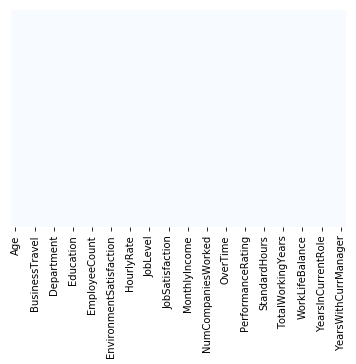

In [9]:
# Le´s check iof we have missing data (we don´t)

sns.heatmap(data_raw.isnull(), yticklabels=False, cbar= False, cmap="Blues")

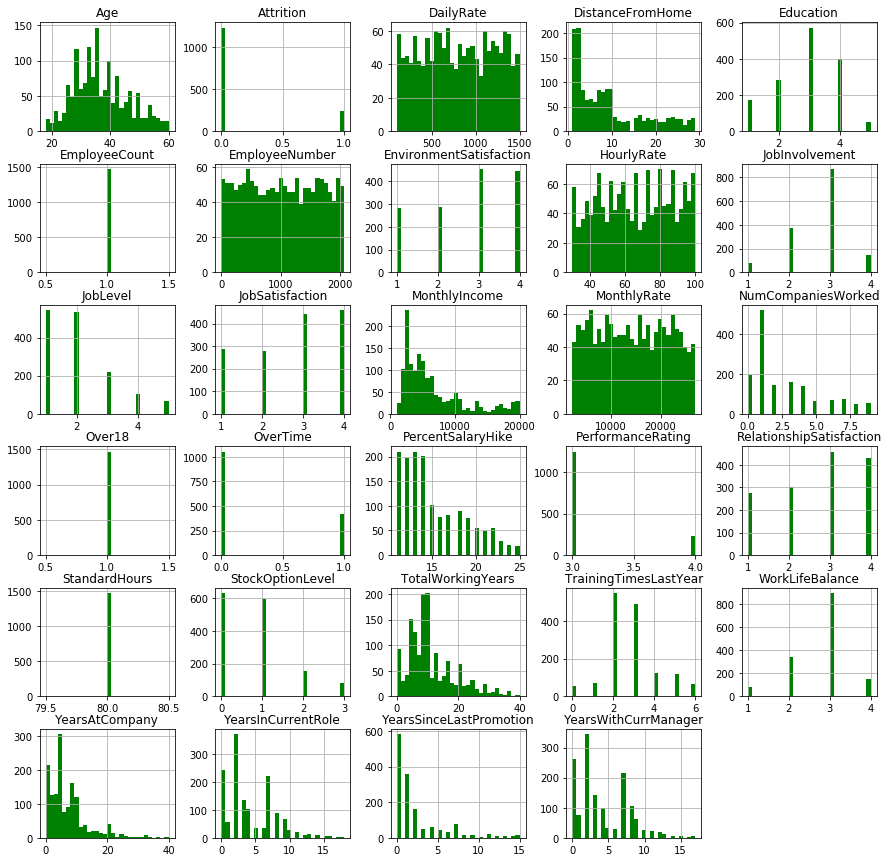

In [10]:
# I want to se the distribution of the data within each column/attribute

data_raw.hist(bins = 30, figsize= (15,15), color = "g");

In [11]:
# It makes sense to drop 'EmployeeCount' , 'Standardhours' y 'Over18' as they take the same value for every employee
# let´s drop 'EmployeeNumber' too.

data = data_raw.drop(["Over18", "EmployeeNumber", "EmployeeCount", "StandardHours"], axis=1)
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2


In [12]:
data.shape # just checking

(1470, 31)

In [13]:
# Let´s see how many employees leave the company

left_df = data[data["Attrition"] == 1]
stayed_df = data[data["Attrition"] == 0]

In [14]:
# The targets are umbalanced, many stay, few leave.

l = len(left_df)
s = len(stayed_df)

print("total", l + s)
print("employees who leave:", l)
print("employees who stay;", s)
print("% of employees leaving:" , int(100*(l/(s+l))), "%") 
print("% of employees staying:" , int(100*(s/(s+l))), "%") 

total 1470
employees who leave: 237
employees who stay; 1233
% of employees leaving: 16 %
% of employees staying: 83 %


In [15]:
left_df.describe()

# 'age': the mean age of the employees who stay is higher.
# 'DailyRate': The DailyRate of the employees that stay is higher.
# 'DistanceFromHome': The employees who stay live nearer their jobs
#  And so on...

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,237.000000,237.0,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000
mean,33.607595,1.0,750.362869,10.632911,2.839662,2.464135,65.573840,2.518987,1.637131,2.468354,4787.092827,14559.308017,2.940928,0.535865,15.097046,3.156118,2.599156,0.527426,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321
std,9.689350,0.0,401.899519,8.452525,1.008244,1.169791,20.099958,0.773405,0.940594,1.118058,3640.210367,7208.153264,2.678519,0.499768,3.770294,0.363735,1.125437,0.856361,7.169204,1.254784,0.816453,5.949984,3.174827,3.153077,3.143349
min,18.000000,1.0,103.000000,1.000000,1.000000,1.000000,31.000000,1.000000,1.000000,1.000000,1009.000000,2326.000000,0.000000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,1.0,408.000000,3.000000,2.000000,1.000000,50.000000,2.000000,1.000000,1.000000,2373.000000,8870.000000,1.000000,0.000000,12.000000,3.000000,2.000000,0.000000,3.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,32.000000,1.0,699.000000,9.000000,3.000000,3.000000,66.000000,3.000000,1.000000,3.000000,3202.000000,14618.000000,1.000000,1.000000,14.000000,3.000000,3.000000,0.000000,7.000000,2.000000,3.000000,3.000000,2.000000,1.000000,2.000000
75%,39.000000,1.0,1092.000000,17.000000,4.000000,4.000000,84.000000,3.000000,2.000000,3.000000,5916.000000,21081.000000,5.000000,1.000000,17.000000,3.000000,4.000000,1.000000,10.000000,3.000000,3.000000,7.000000,4.000000,2.000000,5.000000
max,58.000000,1.0,1496.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19859.000000,26999.000000,9.000000,1.000000,25.000000,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,15.000000,15.000000,14.000000


In [16]:
stayed_df.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1233.000000,1233.0,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.00000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000
mean,37.561233,0.0,812.504461,8.915653,2.927007,2.771290,65.952149,2.770479,2.145985,2.778589,6832.739659,14265.779400,2.64558,0.234388,15.231144,3.153285,2.733982,0.845093,11.862936,2.832928,2.781022,7.369019,4.484185,2.234388,4.367397
std,8.888360,0.0,403.208379,8.012633,1.027002,1.071132,20.380754,0.692050,1.117933,1.093277,4818.208001,7102.260749,2.46009,0.423787,3.639511,0.360408,1.071603,0.841985,7.760719,1.293585,0.681907,6.096298,3.649402,3.234762,3.594116
min,18.000000,0.0,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1051.000000,2094.000000,0.00000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,0.0,477.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,3211.000000,7973.000000,1.00000,0.000000,12.000000,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.0,817.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,5204.000000,14120.000000,2.00000,0.000000,14.000000,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,6.000000,3.000000,1.000000,3.000000
75%,43.000000,0.0,1176.000000,13.000000,4.000000,4.000000,83.000000,3.000000,3.000000,4.000000,8834.000000,20364.000000,4.00000,0.000000,18.000000,3.000000,4.000000,1.000000,16.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000
max,60.000000,0.0,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26997.000000,9.00000,1.000000,25.000000,4.000000,4.000000,3.000000,38.000000,6.000000,4.000000,37.000000,18.000000,15.000000,17.000000


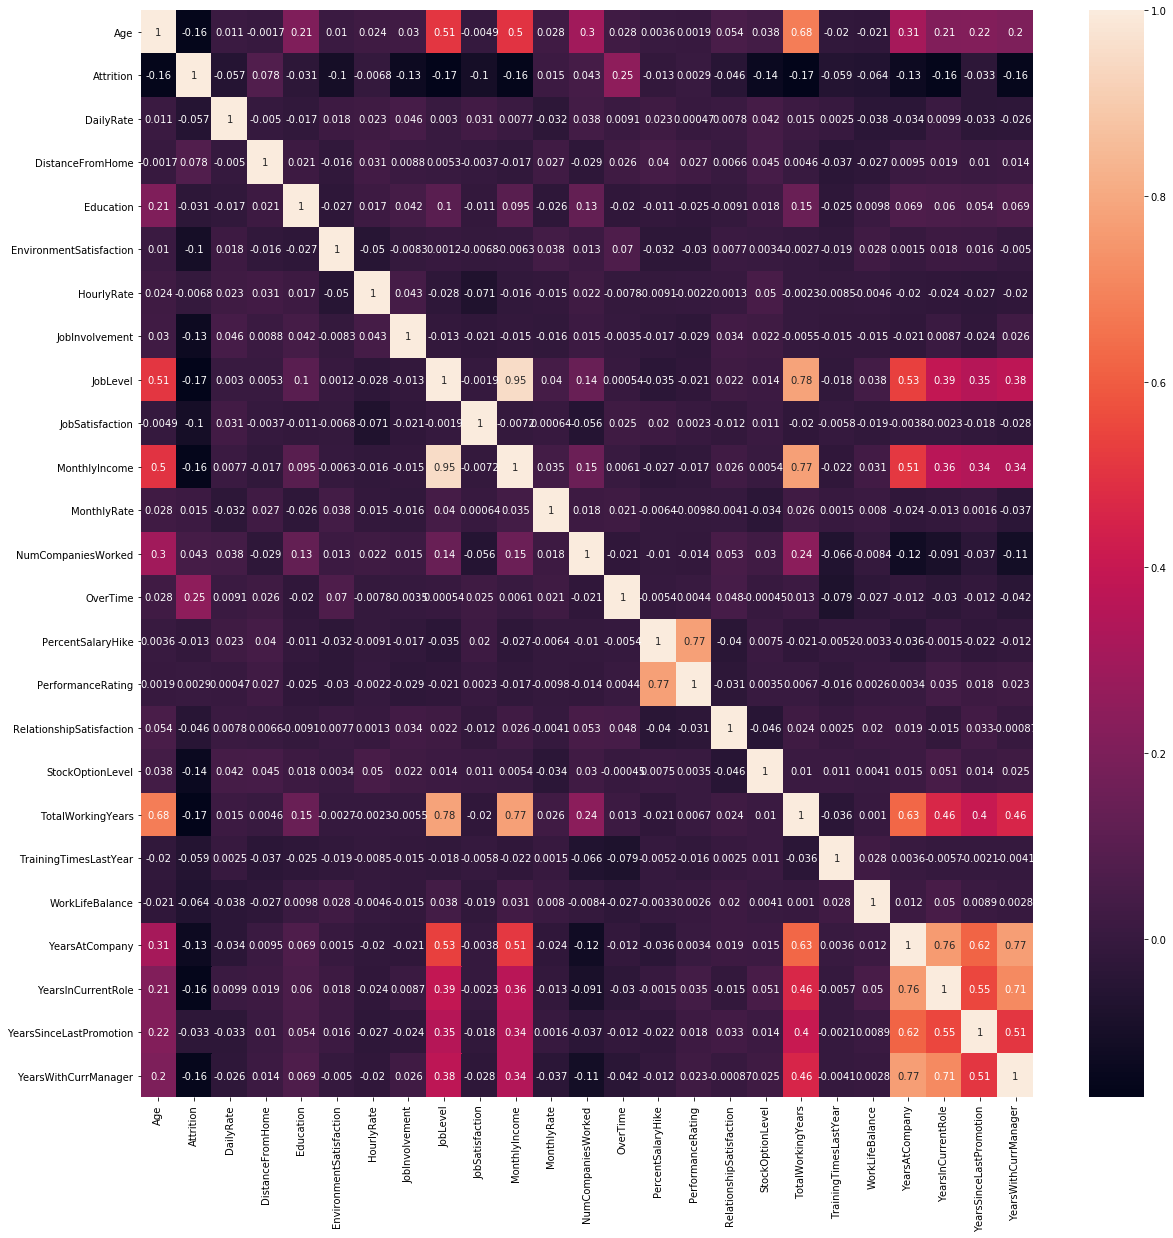

In [17]:
# Let´s get a correlation matrix
correlations = data.corr()
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(correlations, annot=True);

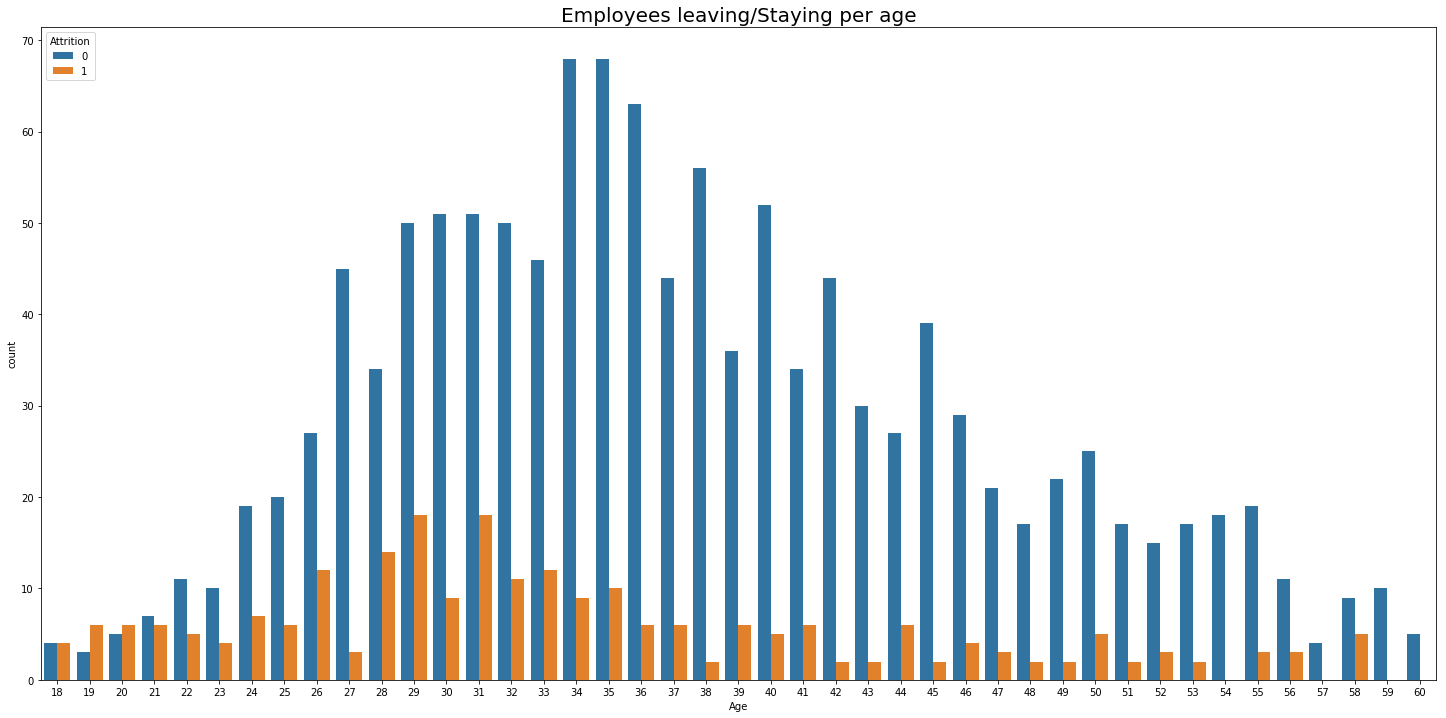

In [18]:
# We can see the ammount of employees leaving/staying per age

plt.figure(figsize=(25,12))
sns.countplot(x = "Age", hue = "Attrition", data = data);
plt.title("Employees leaving/Staying per age", fontsize=20);
# Employees tend to leave when they are around 29.

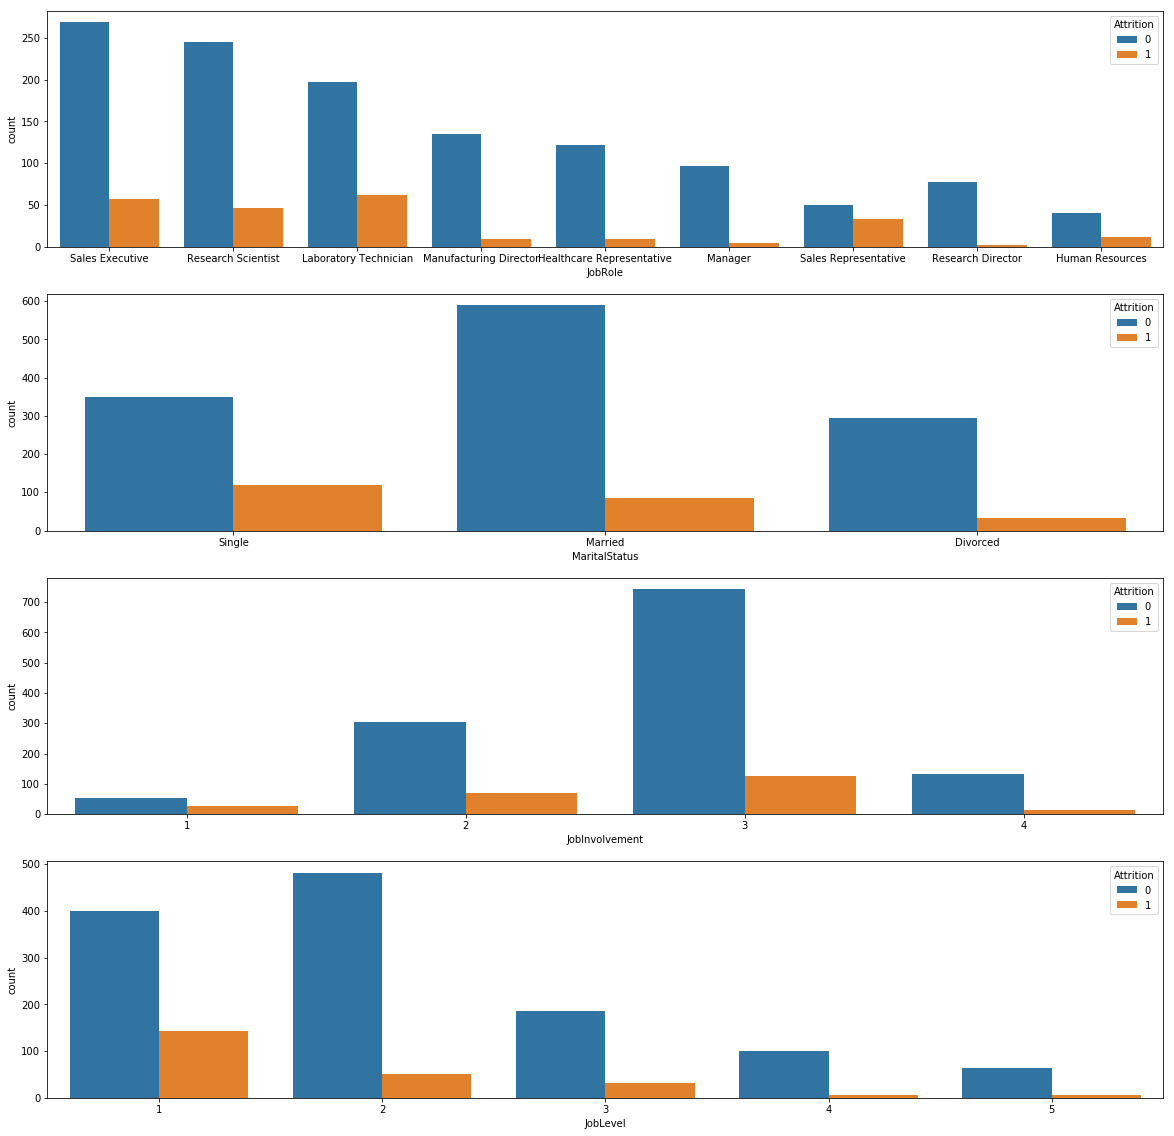

In [19]:
# Let´s see how the abandoning rate is depending on other attributes.

fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows = 4, ncols = 1, figsize = (20,20))
sns.countplot(x = "JobRole", hue = "Attrition", data = data , ax = ax1 )
sns.countplot(x = "MaritalStatus", hue = "Attrition", data = data , ax = ax2 )
sns.countplot(x = "JobInvolvement", hue = "Attrition", data = data , ax = ax3)
sns.countplot(x = "JobLevel", hue = "Attrition", data = data , ax = ax4 );

In [20]:
# Sales representatives tend to leave A LOT, we should check out what is going on there.

/home/mateo/miniconda3/envs/env/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


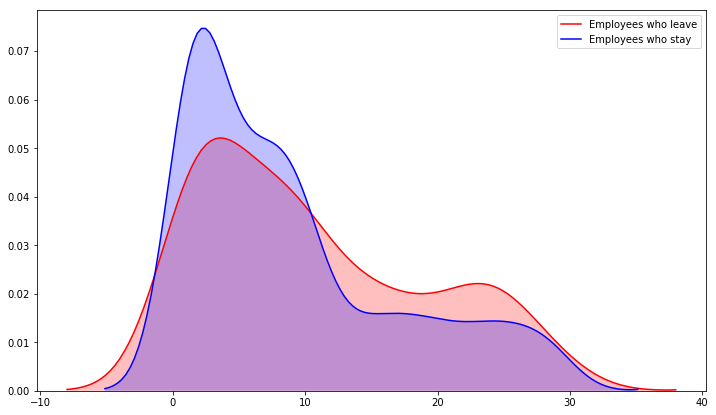

In [21]:
# This compares the distribution (density by their distance from work) of the leaving and staying employees.

fig, ax = plt.subplots(figsize=(12,7))
sns.kdeplot(left_df["DistanceFromHome"], label = "Employees who leave", shade= True, color= "r")
sns.kdeplot(stayed_df["DistanceFromHome"], label = "Employees who stay", shade = True, color = "b")
plt.legend();

In [22]:
# Makes sense...

/home/mateo/miniconda3/envs/env/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


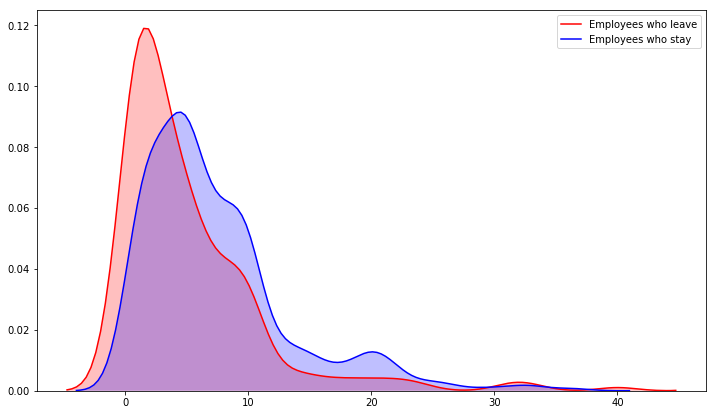

In [23]:
# Same thing but the density is by years at the company

fig, ax = plt.subplots(figsize=(12,7))

sns.kdeplot(left_df["YearsAtCompany"] , shade = True ,label = "Employees who leave", color = "r")
sns.kdeplot(stayed_df["YearsAtCompany"], shade = True , label = "Employees who stay", color = "b");

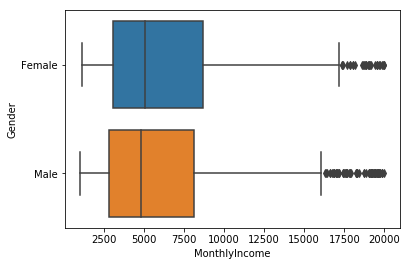

In [24]:
# This two boxplots are´nt very relevant to our analysis, ignore them if you want:
# Gender vs monthly income
sns.boxplot(x = "MonthlyIncome", y = "Gender", data = data)
# Good to see there's no sexism in the company!

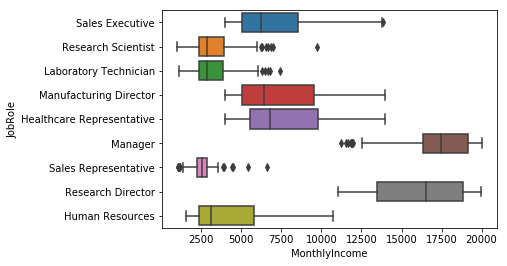

In [25]:
# monthly income vs. job role
sns.boxplot(x = "MonthlyIncome", y = "JobRole", data = data);

#This kind of explains why sales representatives tend to leave...

# Data preparation

in the future use ColumnTransformer to simplify this column.

In [26]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2


In [27]:
# Categorical attributes DF
x_cat = data[["BusinessTravel", "Department", "EducationField", "Gender", "JobRole","MaritalStatus"]]

In [28]:
# Encoding the categorical attributes with OneHotEncoder
onehotencoder = OneHotEncoder()
x_cat = onehotencoder.fit_transform(x_cat).toarray()

In [29]:
x_cat = pd.DataFrame(x_cat)
x_cat.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [30]:
# Numerical values DF

x_numerical = data[["Age", 
                    "DailyRate", 
                    "DistanceFromHome",
                    "Education", 
                    "EnvironmentSatisfaction", 
                    "HourlyRate", 
                    "JobInvolvement", 
                    "JobLevel", 
                    "JobSatisfaction",
                    "MonthlyIncome", 
                    "MonthlyRate", 
                    "NumCompaniesWorked",
                    "OverTime",
                    "PercentSalaryHike",
                    "PerformanceRating",
                    "RelationshipSatisfaction",
                    "StockOptionLevel",
                    "TotalWorkingYears", 
                    "TrainingTimesLastYear" ,
                    "WorkLifeBalance", 
                    "YearsAtCompany",
                    "YearsInCurrentRole", 
                    "YearsSinceLastPromotion",
                    "YearsWithCurrManager"]]

# Notice i left out the target "Atrittion"

In [31]:
# Now let´s concatenate the encocded categorical df and the numerical df

x_all = pd.concat([x_cat, x_numerical], axis = 1)
x_all.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,41,1102,1,2,2,94,3,2,4,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,49,279,8,1,3,61,2,2,2,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,37,1373,2,2,4,92,2,1,3,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,33,1392,3,4,4,56,3,1,3,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,27,591,2,1,1,40,3,1,2,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2


In [32]:
# Let's create the targets series

y = data["Attrition"]

In [33]:
# Let's split our data in a train and test set

np.random.seed(11)
X_train, X_test, y_train, y_test = train_test_split(x_all, y, test_size = 0.2)

# Modeling

## Training and testing of three different models:

In [34]:
# We´ll start by instanciating the models:

rfc = RandomForestClassifier()
ada = AdaBoostClassifier()
lg = LogisticRegression(max_iter = 10000, solver="lbfgs") #If i don't set these hyperparameters it returns an annoying warning

In [35]:
# Let´s fit the models:

rfc.fit(X_train.values, y_train.values)
ada.fit(X_train.values, y_train.values)
lg.fit(X_train.values, y_train.values);

/home/mateo/miniconda3/envs/env/lib/python3.5/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


As seen in the following cells, we have similar accuraccy in the three models

In [36]:
rfc.score(X_test.values, y_test.values)

0.8435374149659864

In [37]:
ada.score(X_test.values, y_test.values)

0.8741496598639455

In [38]:
lg.score(X_test.values, y_test.values)

0.8707482993197279

Anyway, the accuracy doesn´t say much in our problem, since as we´ve seen, the greatest part of the employees tend to stay in the company, thus, if the model is guessing that the employee is always going to stay, it would still have a high accuracy! So let´s check the confusion matrix of these three models to understand better what´s going on.

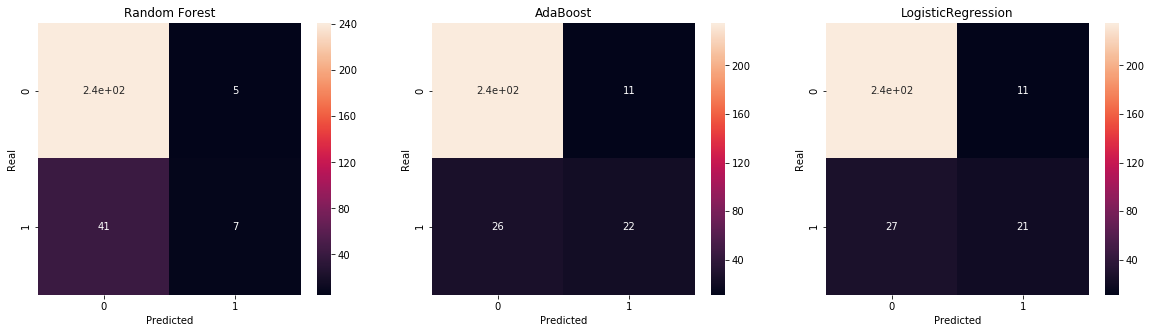

In [39]:
# This makes predictions for each model
y_preds_rfc = rfc.predict(X_test.values)
y_preds_ada = ada.predict(X_test.values)
y_preds_lg = lg.predict(X_test.values)

# This creates a confussion matrix for each model
cm_rfc = confusion_matrix(y_test, y_preds_rfc)
cm_ada = confusion_matrix(y_test, y_preds_ada)
cm_lg = confusion_matrix(y_test, y_preds_lg)

# This plots the three confusion matrixes in one graph
fig, (ax1,ax2,ax3) = plt.subplots(nrows = 1, ncols = 3, figsize=(20,5))
sns.heatmap(cm_rfc, annot = True, ax = ax1)
sns.heatmap(cm_ada, annot= True, ax = ax2)
sns.heatmap(cm_lg, annot = True, ax = ax3)
ax1.set(title = "Random Forest", xlabel="Predicted", ylabel= "Real")
ax2.set(title = "AdaBoost", xlabel="Predicted", ylabel= "Real")
ax3.set(title = "LogisticRegression", xlabel="Predicted", ylabel= "Real");

In [40]:
# Logistic regression and Ada Boost are tied.

I want more relyable metrics to help me decide between AdaBoost and LogisticRegression, i'll use cross validation.

In [41]:
# This scores the three models using a 13 folds cross validation

models = {"RandomForestClassifier": rfc, "AdaBoost" : ada, "LogisticRegression": lg}

for key in models:
    score = cross_validate(models[key], x_all, y,  cv= 13,  scoring = ["recall", "accuracy", "precision"])
    print (key, "accuracy" , np.mean(score["test_accuracy"]))
    print (key, "recall", np.mean(score["test_recall"]))
    print (key, "precision", np.mean(score["test_precision"]))
    print("")

RandomForestClassifier accuracy 0.855131361419205
RandomForestClassifier recall 0.16891587944219524
RandomForestClassifier precision 0.7221611721611721

AdaBoost accuracy 0.8748616990058534
AdaBoost recall 0.39653621232568603
AdaBoost precision 0.7161138007291854

LogisticRegression accuracy 0.8795726765859511
LogisticRegression recall 0.4003598740440845
LogisticRegression precision 0.741262156646772



In [42]:
# Logistic regression has higher values in all three metrics! we'll chose it as our model.


# Hyperparameter tuning for Logistic Regression

A lot of different hyperparameters grids were tryed, as some hyperparámeters aren't compatible with each other. After some experimentation, the best result was achieved with the next grid.

In [43]:
lg_grid = {
          'C': [0.01, 0.1, 1, 10, 100, 1000],
          'penalty': ['l1'],
          'max_iter': list(range(100,800,200)),
          'solver': ["liblinear", "saga"]
          }
    
lg_gs = GridSearchCV(lg, param_grid = lg_grid, 
                     cv =5,
                     n_jobs=-1,
                     verbose=0 ,
                     scoring = "recall"
                     ) # I also found that optymizing the recall gave the best results

lg_gs.fit(X_train, y_train);

/home/mateo/miniconda3/envs/env/lib/python3.5/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [44]:
# this asks for the best hyperparameters found
bp = lg_gs.best_params_
bp

{'C': 10, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}

In [45]:
# this creates an instance with the best hyperparameters found and tests it using cross validation.

lg_bp = LogisticRegression(C = 10, max_iter = 100, penalty = 'l1', solver = 'liblinear')

score = cross_validate(lg_bp , x_all, y,  cv= 13,  scoring = ["recall", "accuracy", "precision"], verbose=0)
print ("lg_bp accuracy" , np.mean(score["test_accuracy"]))
print ("lg_bp recall", np.mean(score["test_recall"]))
print ("lg_bp precision", np.mean(score["test_precision"]))

lg_bp accuracy 0.8809584589451845
lg_bp recall 0.4257759784075573
lg_bp precision 0.7284832688678843


We won 2.5 points in recall but lost 1.3 in precision, not a big improvement...

The next two cells create and plot cross validated confusion matrixes for the stock LogisticRegresson and the tuned one

In [46]:
#Cross-validated confusion matrix for the tuned model

cm_bp = 0
for i in range(30):
    np.random.seed(i)
    X_train, X_test, y_train, y_test = train_test_split(x_all, y, test_size=0.2)
    lg_bp.fit(X_train,y_train)
    y_preds = lg_bp.predict(X_test.values)
    cm = confusion_matrix(y_test, y_preds)
    cm_bp = cm_bp + cm
cm_bp = cm_bp/30

#Cross-validated confusion matrix for the stock model

cm_stock = 0
for i in range(30):
    np.random.seed(i)
    X_train, X_test, y_train, y_test = train_test_split(x_all, y, test_size=0.2)
    lg.fit(X_train,y_train)
    y_preds = lg.predict(X_test.values)
    cm_stock = cm_stock + confusion_matrix(y_test, y_preds)    
cm_stock = cm_stock/30

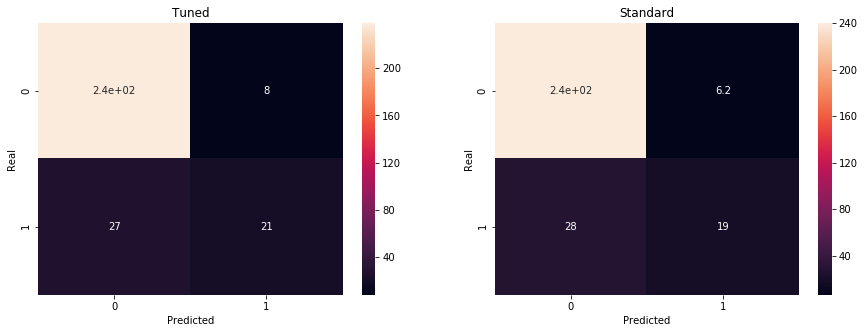

In [47]:
fig, (ax1,ax2) = plt.subplots(figsize=(15,5), nrows=1, ncols=2)
sns.heatmap(cm_bp, annot=True, ax=ax1)
sns.heatmap(cm_stock, annot=True, ax=ax2)

ax1.set(title = "Tuned", xlabel="Predicted", ylabel= "Real")
ax2.set(title = "Standard", xlabel="Predicted", ylabel= "Real");

In [48]:
# We improoved the amount of quiters identified, but the amount of fake positives also increased.

In [49]:
# To do: Export the model.